###### Algorithm to plot the magnetization curves and compute the critical temperatures and critical exponents of magnetic thin films varying the thickness. The simulation was made using a constant anisotropy K = 0.1, and changing a parameter Gamma (0.037, 0.111, 0.333, 1.000, 3.000 and 9.000) related with the superficial anisotropy. The thickness used in the simulation were d = 2, 4, 6, 8, 10, 12, 14 and 16. The critical temperature was obtained using a regression with the library curve_fit, that also give us the critical exponent of each simulation.

In [4]:
#%matplotlib inline

# Files management

In [5]:
import glob
import re
import collections
import os

In [6]:
# Glob sirve para buscar archivos
files = {g: sorted(glob.glob('../d*/k0.1/gamma%s/resultados.dat' % g)) for g in ('0.037', '0.111', '0.333', '1.000', '3.000', '9.000')}
files = collections.OrderedDict(sorted(files.items()))

filename = re.compile(r'../d(?P<d>\d+)/k[0-9.]+/gamma[0-9.]+/resultados.dat')

for gamma, filenames in files.items():
    for file in filenames:
        match = filename.match(file)
        
os.makedirs('../01Magnetization_Curves')
os.makedirs('../02Critical_Values')

###### The file 'resultados.dat'  contains the following columns with information

- Temperature
- Mean Energy
- Normalized Energy
- Specific Heat
- Mean Magnetization
- Normalized Magnetization
- Susceptibilty

# Importing Modules

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import loadtxt
from scipy.optimize import curve_fit

###### Function to obtain the value of the critical temperature and the critical exponent using curve_fit.

In [8]:
def magnetization(T, Tc, beta, A):
    result = np.zeros_like(T)
    result[T < Tc] = A * (1 - T[T < Tc] / Tc) ** beta
    return result

###### Ploting Magnetization vs Temperature for each Gamma and different thickness. Computation of the values of the critical temperatures and critical exponents of each simulation.


Gamma =  0.037
d =  02
Tc (d 02 ) =  459.184629477
Ec (d 02 ) =  3.9212393355 

d =  08
Tc (d 08 ) =  391.183939966
Ec (d 08 ) =  0.483567595919 

d =  16
Tc (d 16 ) =  403.149323281
Ec (d 16 ) =  0.441496665966 



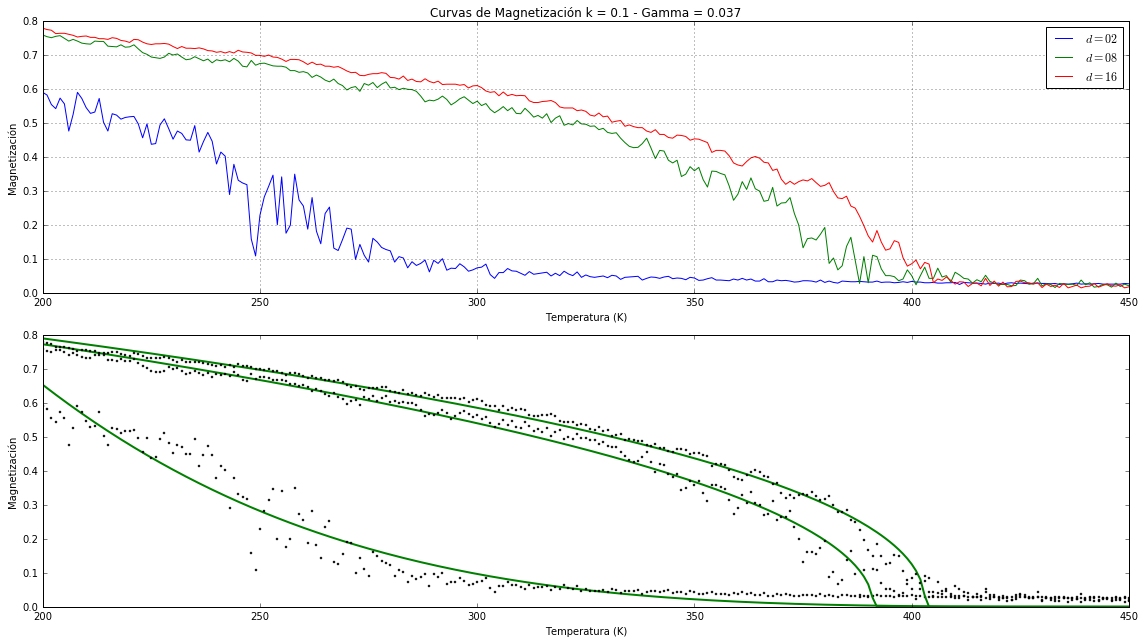


Gamma =  0.111
d =  02
Tc (d 02 ) =  415.495398597
Ec (d 02 ) =  3.13465753985 

d =  08
Tc (d 08 ) =  398.10351107
Ec (d 08 ) =  0.564401718692 

d =  16
Tc (d 16 ) =  400.046835539
Ec (d 16 ) =  0.423542521367 



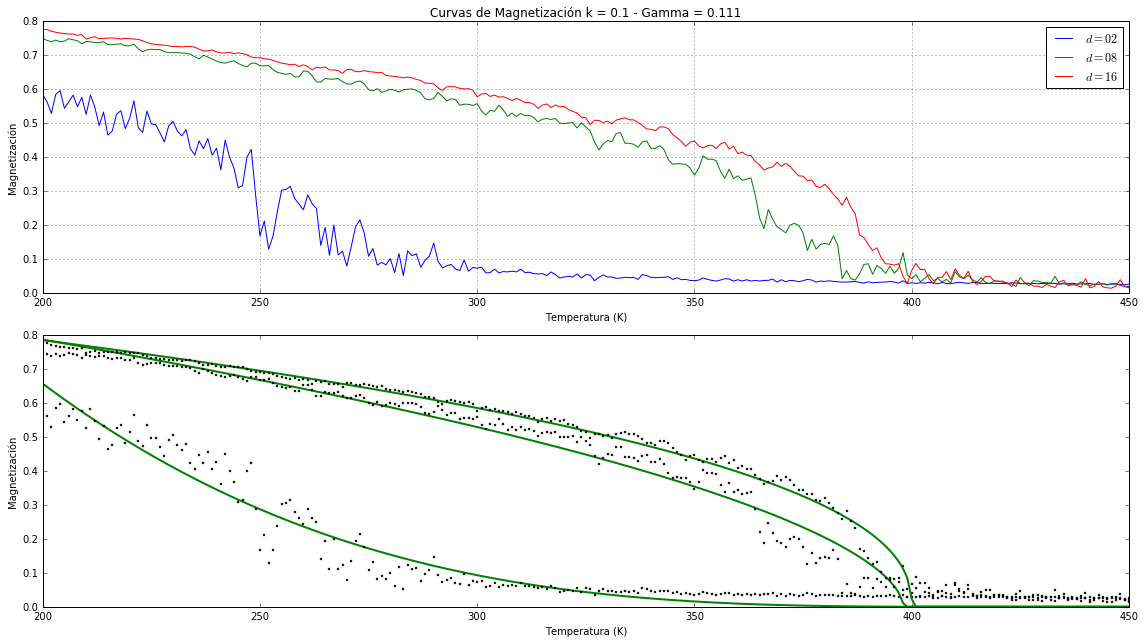


Gamma =  0.333
d =  02
Tc (d 02 ) =  392.446418961
Ec (d 02 ) =  2.70879619807 

d =  08
Tc (d 08 ) =  390.061398091
Ec (d 08 ) =  0.471861863189 

d =  16
Tc (d 16 ) =  397.264673297
Ec (d 16 ) =  0.397805896618 



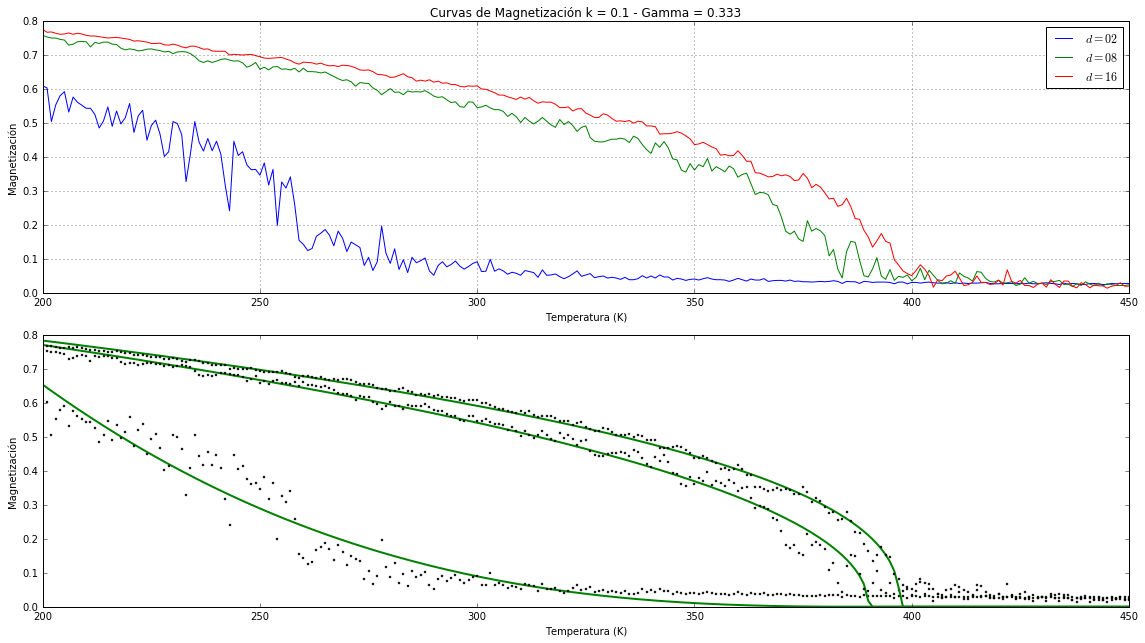


Gamma =  1.000
d =  02
Tc (d 02 ) =  604.507161429
Ec (d 02 ) =  6.85908188979 

d =  08
Tc (d 08 ) =  387.068469774
Ec (d 08 ) =  0.450390999991 

d =  16
Tc (d 16 ) =  396.39625914
Ec (d 16 ) =  0.386181843747 



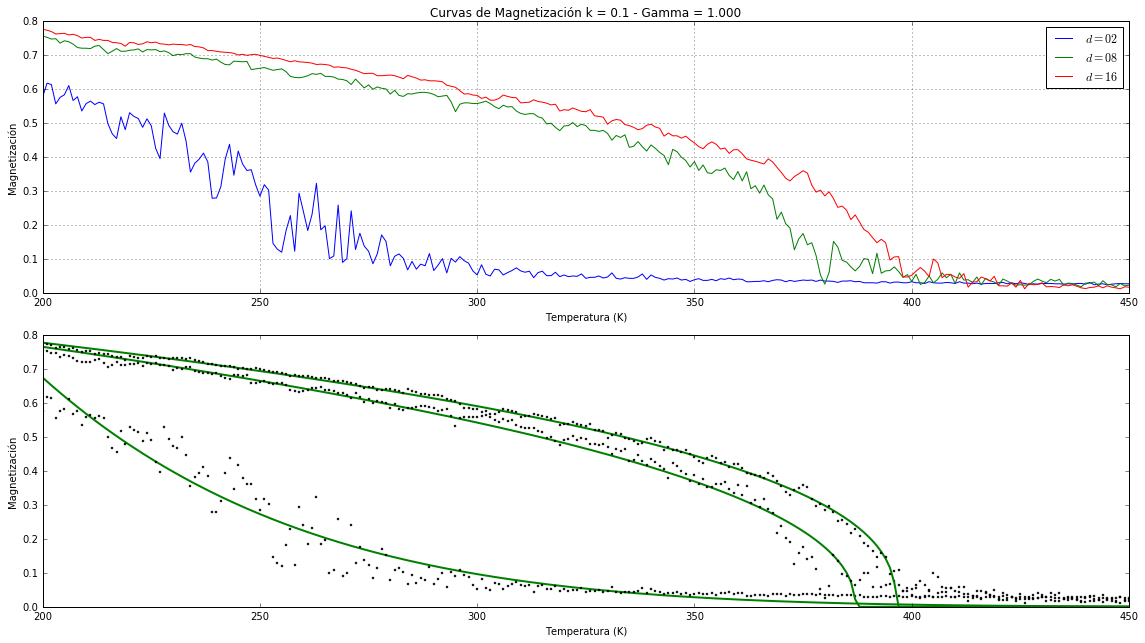


Gamma =  3.000



Gamma =  9.000


In [9]:
for fileGamma in files:
    file_save = open('../02Critical_Values/01aTc_k01_%s.txt' % fileGamma, 'a')
    plt.figure(figsize=(16,9))

    print("\nGamma = ", fileGamma)
    
    for file in files[fileGamma]:
        temp, mag = loadtxt(file, usecols=(0, 5, ), unpack=True)
        d = filename.match(file).groupdict()['d']
                
        print("d = ", d)

        plt.subplot(211)
        plt.plot(temp, mag, label= "$d = %s$" % (d, ))
        plt.legend()
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Magnetización')
        plt.title('Curvas de Magnetización k = 0.1 - Gamma = %s' % fileGamma)
        plt.grid(True)
        plt.tight_layout()

        params, corr = curve_fit(magnetization, temp, mag, p0 = (450, 0.5, 1.0))

        plt.subplot(212)
        plt.plot(temp,magnetization(temp,*params), '-g', linewidth=2)#, label = 'fit')
        plt.plot(temp, mag, 'ok', ms=2)#, label = "Magnetization")
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Magnetización')
        plt.grid(False)

        print('Tc (d',d,') = ', params[0])
        print('Ec (d',d,') = ', params[1], '\n')

        file_save.write(d)
        file_save.write(' ')
        file_save.write(str(params[0]))
        file_save.write(' ')
        file_save.write(str(params[1]))
        file_save.write('\n')

    plt.savefig('../01Magnetization_Curves/01a_Graph_k01_Gamma%s.png' % fileGamma)
    plt.close()

    file_save.close()